In [1]:
import pandas as pd
df=pd.read_csv("/home/user/Downloads/Ml_Lab/Week7_train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(42000, 785)

In [3]:
# 4.select only 10% of the data
samp=df.sample(frac=0.10)
samp

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41695,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38381,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37346,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5038,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30932,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
samp.shape

(4200, 785)

In [5]:
samp.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41695,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38381,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37346,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5038,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 7.find no.of unique class labels
samp['label'].nunique()

10

In [7]:
# 8.print the no.of examples for each class label
print(samp['label'].value_counts())
# samp['label'].unique()
samp.groupby('label')['label'].count()

label
1    507
6    442
2    433
9    429
3    429
7    421
0    397
8    386
5    386
4    370
Name: count, dtype: int64


label
0    397
1    507
2    433
3    429
4    370
5    386
6    442
7    421
8    386
9    429
Name: label, dtype: int64

In [8]:
# 9.prepare x and y
x=samp.iloc[0:,1:]
y=samp.iloc[0:,0]
y

41695    9
27997    8
38381    2
37346    4
5038     8
        ..
19082    8
5936     0
30932    8
31749    0
23000    9
Name: label, Length: 4200, dtype: int64

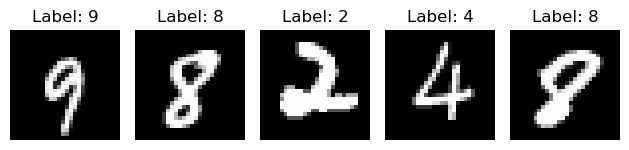

In [9]:
# 10.visualization the image of the first 5 digits in x also print class label in
import matplotlib.pyplot as plt
import numpy as np

# Show the first 5 digit images
for i in range(5):
    image = x.iloc[i].values.reshape(28, 28) if hasattr(x, 'iloc') else x[i].reshape(28, 28)
    label = y.iloc[i] if hasattr(y, 'iloc') else y[i]
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
# 11.split the train dataset into 75% and 25%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.75,random_state=42)
x_train.shape

(1050, 784)

In [11]:
# 12.Fit the traindata
# 13.Default parameters n-neighbours=5,metrics='minkowski',p=2
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
data = model.fit(x_train,y_train)
data

KNeighborsClassifier()

In [12]:
#14. predict the validation set results
y_pred = model.predict(x_test)
y_pred


array([8, 2, 7, ..., 2, 8, 1])

In [15]:
# 15.print the confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confussion = confusion_matrix(y_test,y_pred)
classify = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confussion matrix:\n",confussion)
print("classification report:",classify)
print("accuracy:",accuracy)

confussion matrix:
 [[288   0   0   0   1   1   8   0   1   1]
 [  0 384   0   0   0   0   1   1   1   0]
 [  4  17 261   5   3   3   2  19   3   7]
 [  3   9   8 282   0   8   0   3   6   5]
 [  0   8   0   0 226   0   5   2   0  39]
 [  6   8   0  20   1 229   8   0   4   7]
 [  3   4   1   1   0   2 312   0   0   0]
 [  0  13   1   0   3   0   1 297   0  11]
 [  4  13   7  24   2  14   1   3 209   5]
 [  1   4   0   6  12   0   0  19   0 279]]
classification report:               precision    recall  f1-score   support

           0       0.93      0.96      0.95       300
           1       0.83      0.99      0.91       387
           2       0.94      0.81      0.87       324
           3       0.83      0.87      0.85       324
           4       0.91      0.81      0.86       280
           5       0.89      0.81      0.85       283
           6       0.92      0.97      0.94       323
           7       0.86      0.91      0.89       326
           8       0.93      0.74      

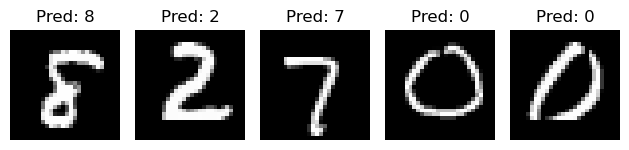

In [14]:
# 17.visualize the image of the first 5 digit in x-test also print the predicted
import matplotlib.pyplot as plt

# Predict labels for x_test
predicted_labels = model.predict(x_test)

# Visualize first 5 images and show predicted labels
for i in range(5):
    image = x_test.iloc[i].values.reshape(28, 28) if hasattr(x_test, 'iloc') else x_test[i].reshape(28, 28)
    label = predicted_labels[i]
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
